# Feature selection

## Read dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# silahkan di ganti path nya
df = pd.read_csv('/content/drive/MyDrive/Data Science Digital Skola/session 37/heart.csv', delimiter=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


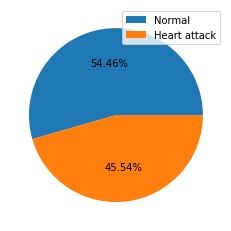

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values
plt.pie(pd.DataFrame(y).value_counts(), autopct='%1.2f%%')
plt.legend(['Normal', 'Heart attack'])
plt.show()

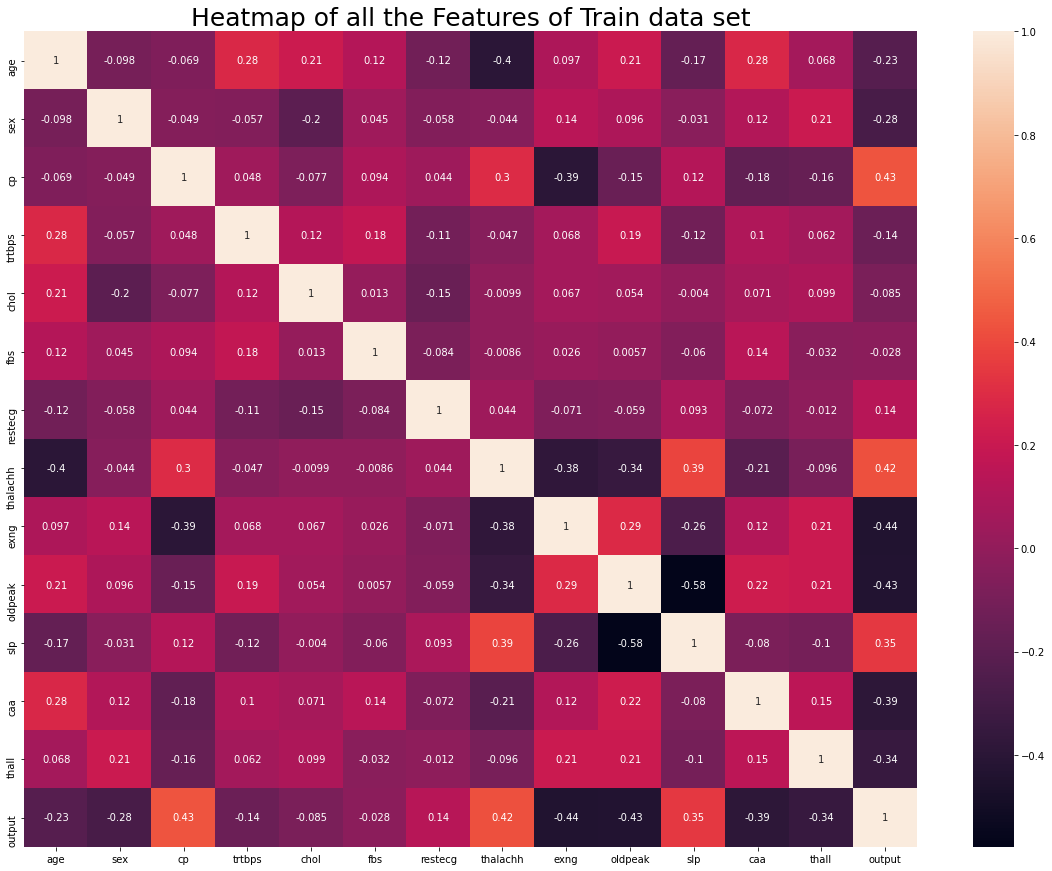

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat([df_X, df_y], axis=1)
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);
plt.show()

## Decision tree using original features

Accuracy  0.7362637362637363
Precision  0.7381528046421664
Recall  0.7402439024390244
Confusion matrix  [[32  9]
 [15 35]]


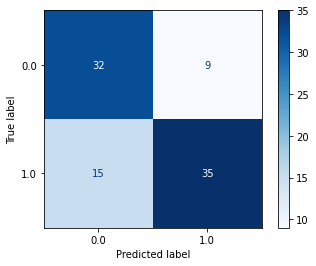

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Filtering method, using ANOVA

Sebelum feature selection  (212, 13)
Setelah feature selection  (212, 8)
Score of features  [11.10851109 20.58085872 48.59574373  0.59397382  0.59877117  0.31089985
  1.46204906 40.9269554  57.695455   48.50771938 28.24118453 46.81205511
 37.68642199]
Score of features  [1.01552795e-03 9.60995300e-06 4.00554531e-11 4.41752777e-01
 4.39917491e-01 5.77722396e-01 2.27963944e-01 1.01086744e-09
 9.93392466e-13 4.15424082e-11 2.72611454e-07 8.40617281e-11
 4.08990656e-09]


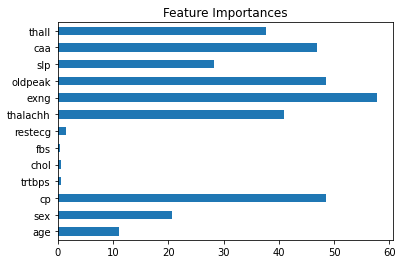

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

filter = SelectKBest(f_classif, k=8)
filter.fit(X_train, y_train)
X_train_new = filter.transform(X_train)
X_test_new = filter.transform(X_test)

print('Sebelum feature selection ', X_train.shape)
print('Setelah feature selection ', X_train_new.shape)
print('Score of features ', filter.scores_)
print('Score of features ', filter.pvalues_)

feat_importances = pd.Series(filter.scores_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()



### DT with feature selection based on filtering method

Accuracy  0.7582417582417582
Precision  0.7577294685990339
Recall  0.7602439024390244
Confusion matrix  [[32  9]
 [13 37]]


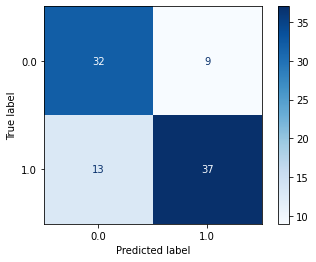

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_new, y_test, cmap=plt.cm.Blues)  
plt.show()

## Wrapper method, using SVM

Sebelum feature selection  (212, 13)
Setelah feature selection  (212, 5)
Score of features  [8 1 2 7 9 5 4 6 1 3 1 1 1]


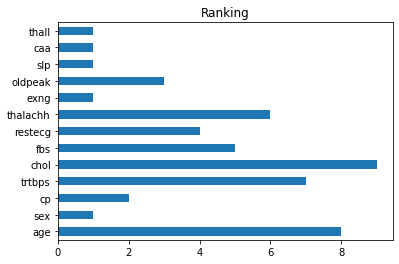

In [23]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

estimator = SVC(kernel="linear")
wrapper = RFE(estimator, n_features_to_select=5)
wrapper.fit(X_train, y_train)
X_train_new = wrapper.transform(X_train)
X_test_new = wrapper.transform(X_test)

print('Sebelum feature selection ', X_train.shape)
print('Setelah feature selection ', X_train_new.shape)
print('Score of features ', wrapper.ranking_)

feat_importances = pd.Series(wrapper.ranking_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Ranking')
plt.show()

### DT with feature selection based on wrapper method/RFE

Accuracy  0.7802197802197802
Precision  0.7857142857142857
Recall  0.786829268292683
Confusion matrix  [[35  6]
 [14 36]]


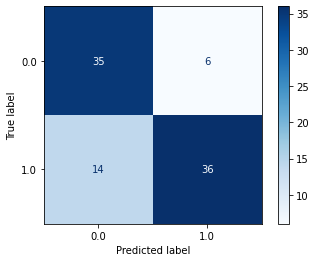

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_new, y_test, cmap=plt.cm.Blues)  
plt.show()

## Embedded method, using ExtraTree

Sebelum feature selection  (212, 13)
Setelah feature selection  (212, 6)
Score of features  [0.06864698 0.05419113 0.1142734  0.05924801 0.05436202 0.02454468
 0.03361371 0.07863889 0.12434475 0.08415603 0.07227328 0.13229248
 0.09941463]
0.07692307692307693


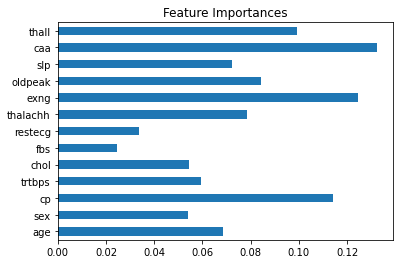

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

clf = ExtraTreesClassifier(random_state=2)
clf = clf.fit(X_train, y_train)
embed = SelectFromModel(clf, prefit=False)
embed.fit(X_train, y_train)
X_train_new = embed.transform(X_train)


X_test_new = embed.transform(X_test)

print('Sebelum feature selection ', X_train.shape)
print('Setelah feature selection ', X_train_new.shape)
print('Score of features ', clf.feature_importances_)
print(np.mean(clf.feature_importances_))
feat_importances = pd.Series(clf.feature_importances_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [ ]:
import numpy as np

x = clf.feature_importances_
threshold = np.mean(x)
threshold

0.07692307692307693

### DT with feature selection based on embedded method

Accuracy  0.7692307692307693
Precision  0.7678916827852997
Recall  0.7702439024390244
Confusion matrix  [[32  9]
 [12 38]]


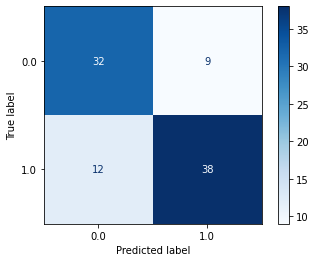

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_new, y_test, cmap=plt.cm.Blues)  
plt.show()

In [28]:
# acc training
print('Accuracy ',model.score(X_train_new,y_train))    
# acc testing
print('Accuracy ',model.score(X_test_new,y_test)) 

Accuracy  0.9952830188679245
Accuracy  0.7692307692307693


## DT (prunning) with embedded method

Accuracy  0.8241758241758241
Precision  0.8224321705426356
Recall  0.8246341463414634
Confusion matrix  [[34  7]
 [ 9 41]]


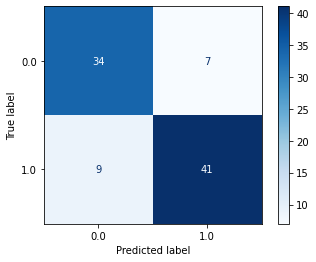

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


model=DecisionTreeClassifier(random_state=42, max_depth=6)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_new, y_test, cmap=plt.cm.Blues)  
plt.show()

In [30]:
# acc training
print('Accuracy ',model.score(X_train_new,y_train))    
# acc testing
print('Accuracy ',model.score(X_test_new,y_test)) 

Accuracy  0.9339622641509434
Accuracy  0.8241758241758241


# Feature Extraction

## Data Visualisation with PCA

## Example PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
# silahkan di ganti path nya
df = pd.read_csv('/content/drive/MyDrive/Data Science Digital Skola/session 37/heart.csv', delimiter=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)
components = pca.fit_transform(X)
list_pca = ['pc1', 'pc2', 'pc3', 'pc4']
principal_df = pd.DataFrame(data = components
             , columns = list_pca)
principal_df.head()

,pc1,pc2,pc3,pc4
0,0.624111,2.321270,2.474673,2.676239
1,-0.455988,-0.957351,1.139595,2.426838
2,-1.828805,0.042885,-0.452229,0.406415
3,-1.716006,-0.495337,0.030631,-0.112162
4,-0.371356,0.301156,-2.841069,-0.809042


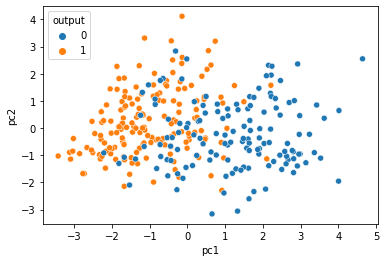

In [32]:
import seaborn as sns
final_df = pd.concat([principal_df, df_y], axis = 1)
sns.scatterplot(x='pc1', y='pc2', hue='output', data=final_df)
plt.show()

In [33]:
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.21254053, 0.11820708, 0.09406418, 0.09085735])

## To speed up ML model and improve accuracy

Accuracy  0.7582417582417582
Precision  0.7636054421768708
Recall  0.7646341463414634
Confusion matrix  [[34  7]
 [15 35]]


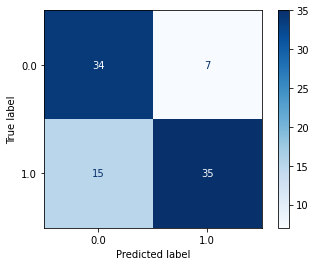

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
sc.fit(X_train, y_train)
X_train_new = sc.transform(X_train)
X_test_new = sc.transform(X_test)

pca = PCA(n_components=8)
pca.fit(X_train_new, y_train)
X_train_pca = pca.transform(X_train_new)
X_test_pca = pca.transform(X_test_new)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_pca, y_test, cmap=plt.cm.Blues)  
plt.show()


## PCA for Image compression

### Read the image

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

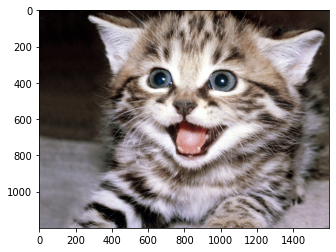

In [50]:
img = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Data Science Digital Skola/session 37/cat.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [52]:
img.shape

(1200, 1600, 3)

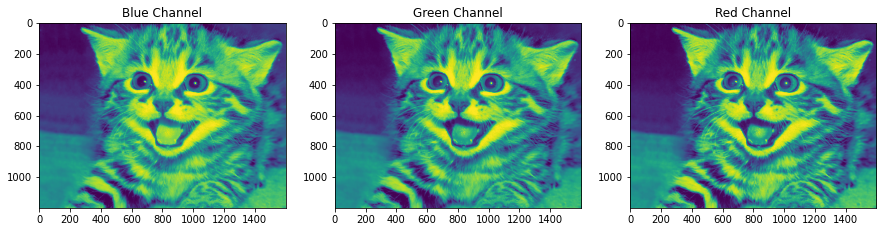

In [53]:
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [ ]:
print('shape original image ',img.shape)

shape original image  (1200, 1600, 3)


### scale the pixel value into 0-1

In [54]:
blue_sc = blue/255
green_sc = green/255
red_sc = red/255

In [55]:
pca = PCA(50)
 
red_transformed = pca.fit_transform(red_sc)
r_arr = pca.inverse_transform(red_transformed)
 
green_transformed = pca.fit_transform(green_sc)
g_arr = pca.inverse_transform(green_transformed)
 
blue_transformed = pca.fit_transform(blue_sc)
b_arr = pca.inverse_transform(blue_transformed)

In [56]:
img_reduced= (cv2.merge((r_arr, g_arr, b_arr)))
print(img_reduced.shape)

(1200, 1600, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


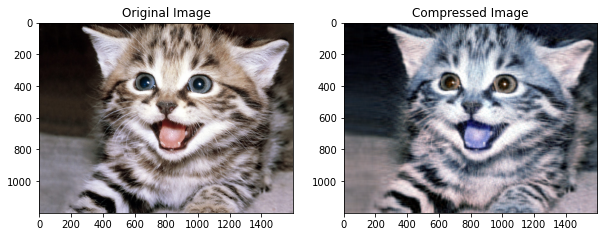

In [59]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Compressed Image")
plt.imshow(img_reduced)
plt.show()

### save the compressed image

In [64]:
cv2.imwrite('/content/drive/MyDrive/Data Science Digital Skola/session 37/cat_compressed.jpg', (img_reduced*255))

True

In [65]:
import io, os
ori_size = os.stat('/content/drive/MyDrive/Data Science Digital Skola/session 37/cat.jpg').st_size
modif_size = os.stat('/content/drive/MyDrive/Data Science Digital Skola/session 37/cat_compressed.jpg').st_size
print('Original image size (Bytes) ', ori_size)
print('Compressed image size (Bytes) ', modif_size)

Original image size (Bytes)  359983
Compressed image size (Bytes)  438466


## ML Pipeline

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = make_pipeline(SelectFromModel(ExtraTreesClassifier(random_state=2)),
                        DecisionTreeClassifier(random_state=42))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 
print('--------')
print('')


Accuracy :  0.7692307692307693
Precision :  0.7678916827852997
Recall/ sensitivity :  0.7702439024390244
--------

